In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the csv files
wardprofile = pd.read_csv("https://raw.githubusercontent.com/ShengAric92/CASA0007_individual/main/wardprofile.csv", low_memory=False)
health2011 = pd.read_csv("https://raw.githubusercontent.com/ShengAric92/CASA0007_individual/main/health2011.csv", low_memory=False)

In [3]:
# clean the wardprofile csv file
# convert the string to float for some columns
wardprofile['population density'] = wardprofile['population density'].str.replace(',', '').astype(float)
wardprofile['median household income'] = wardprofile['median household income'].str.replace(',', '').astype(float)
wardprofile = wardprofile.drop(['ward name'], axis=1)

In [4]:
# clean the health2011 csv file
# calculate the percentage of residents with no unpaid care
health2011 = health2011.drop(['Unnamed: 0'], axis=1)
health2011['% no unpaid care'] = (health2011.iloc[:,2]/(health2011.iloc[:,2] +
                                                                 health2011.iloc[:,3] + health2011.iloc[:,4] + health2011.iloc[:,5]))*100
# calculate the percentage of residents with above the good health level
health2011['% healthy resident'] = ((health2011.iloc[:,6] + health2011.iloc[:,7] + health2011.iloc[:,8])/(health2011.iloc[:,6] +
                                                                                                          health2011.iloc[:,7] + health2011.iloc[:,8] +
                                                                                                          health2011.iloc[:,9] + health2011.iloc[:,10]))*100
# only select the necessary columns
health2011 = health2011[['ward code', 'ward name', '% no unpaid care', '% healthy resident']]

In [5]:
# merge these dataframes to one big dataframe
warddata = pd.merge(health2011, wardprofile, on = 'ward code', how = 'left')
# reorder the column of current dataframe
colward = ['ward code', 'ward name']
colX = ['population density', 'median household income', 'unemployment rate', 'crime rate',
        '% no qualifications', '% no unpaid care', '% healthy resident',
        'open space']
colY = ['life expectancy']
colname = colward + colX + colY
warddata = warddata[colname]
# quick view of the dataframe
warddata.head(15)

,ward code,ward name,population density,median household income,unemployment rate,crime rate,% no qualifications,% no unpaid care,% healthy resident,open space,life expectancy
0,E09000001,City of London,2538.0,63620.0,2.235,13.977,6.7,92.189831,96.664407,-6.479,86.394
1,E05000026,Abbey,10500.0,33920.0,8.906,120.786,16.4,93.242609,95.674957,-0.890,81.998
2,E05000027,Alibon,7429.0,32470.0,10.203,93.150,31.2,90.987000,93.288397,-1.791,78.990
3,E05000028,Becontree,9269.0,33000.0,9.930,104.663,28.0,91.390212,93.035946,-5.470,79.230
4,E05000029,Chadwell Heath,2985.0,33920.0,8.591,83.690,29.1,90.400160,93.194292,1.978,80.761
5,E05000030,Eastbrook,3029.0,37400.0,8.293,61.601,29.9,90.376927,94.089092,5.688,79.212
6,E05000031,Eastbury,8357.0,32870.0,10.200,88.307,28.9,91.018582,93.565038,-8.238,82.048
7,E05000032,Gascoigne,12773.0,29480.0,12.187,109.575,25.5,93.230003,94.161580,-10.013,78.170
8,E05000033,Goresbrook,8692.0,33250.0,9.478,97.824,30.0,91.266531,93.645158,4.827,80.255
9,E05000034,Heath,5475.0,31340.0,11.851,77.107,32.1,91.145930,93.315409,0.441,78.502


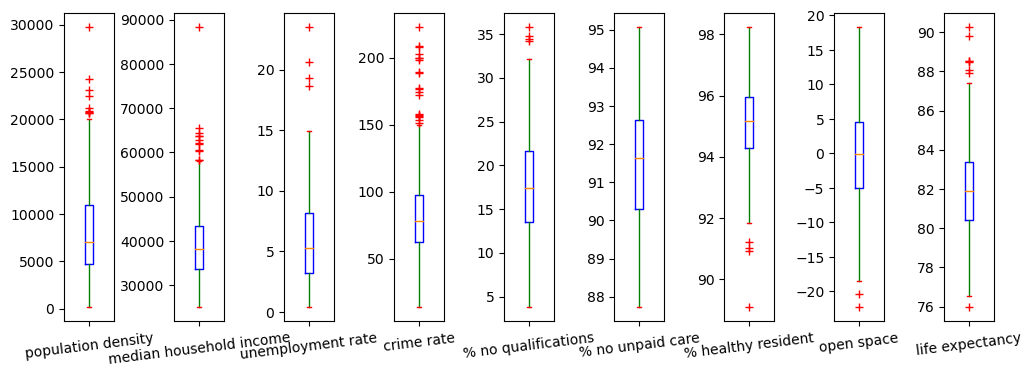

In [7]:
dfdata = warddata.iloc[:, 2:11]
# plot the box plots for each variable
fig,axes = plt.subplots(1,9, figsize=(12,4))
dfdata.plot(kind='box', ax=axes, subplots=True,
            color=dict(boxes='blue', whiskers='green', medians='DarkOrange', caps='Red'),
            sym='r+', rot = 7)

fig.subplots_adjust(wspace=1.2,hspace=1)
# save figure
plt.savefig("qm_21")

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

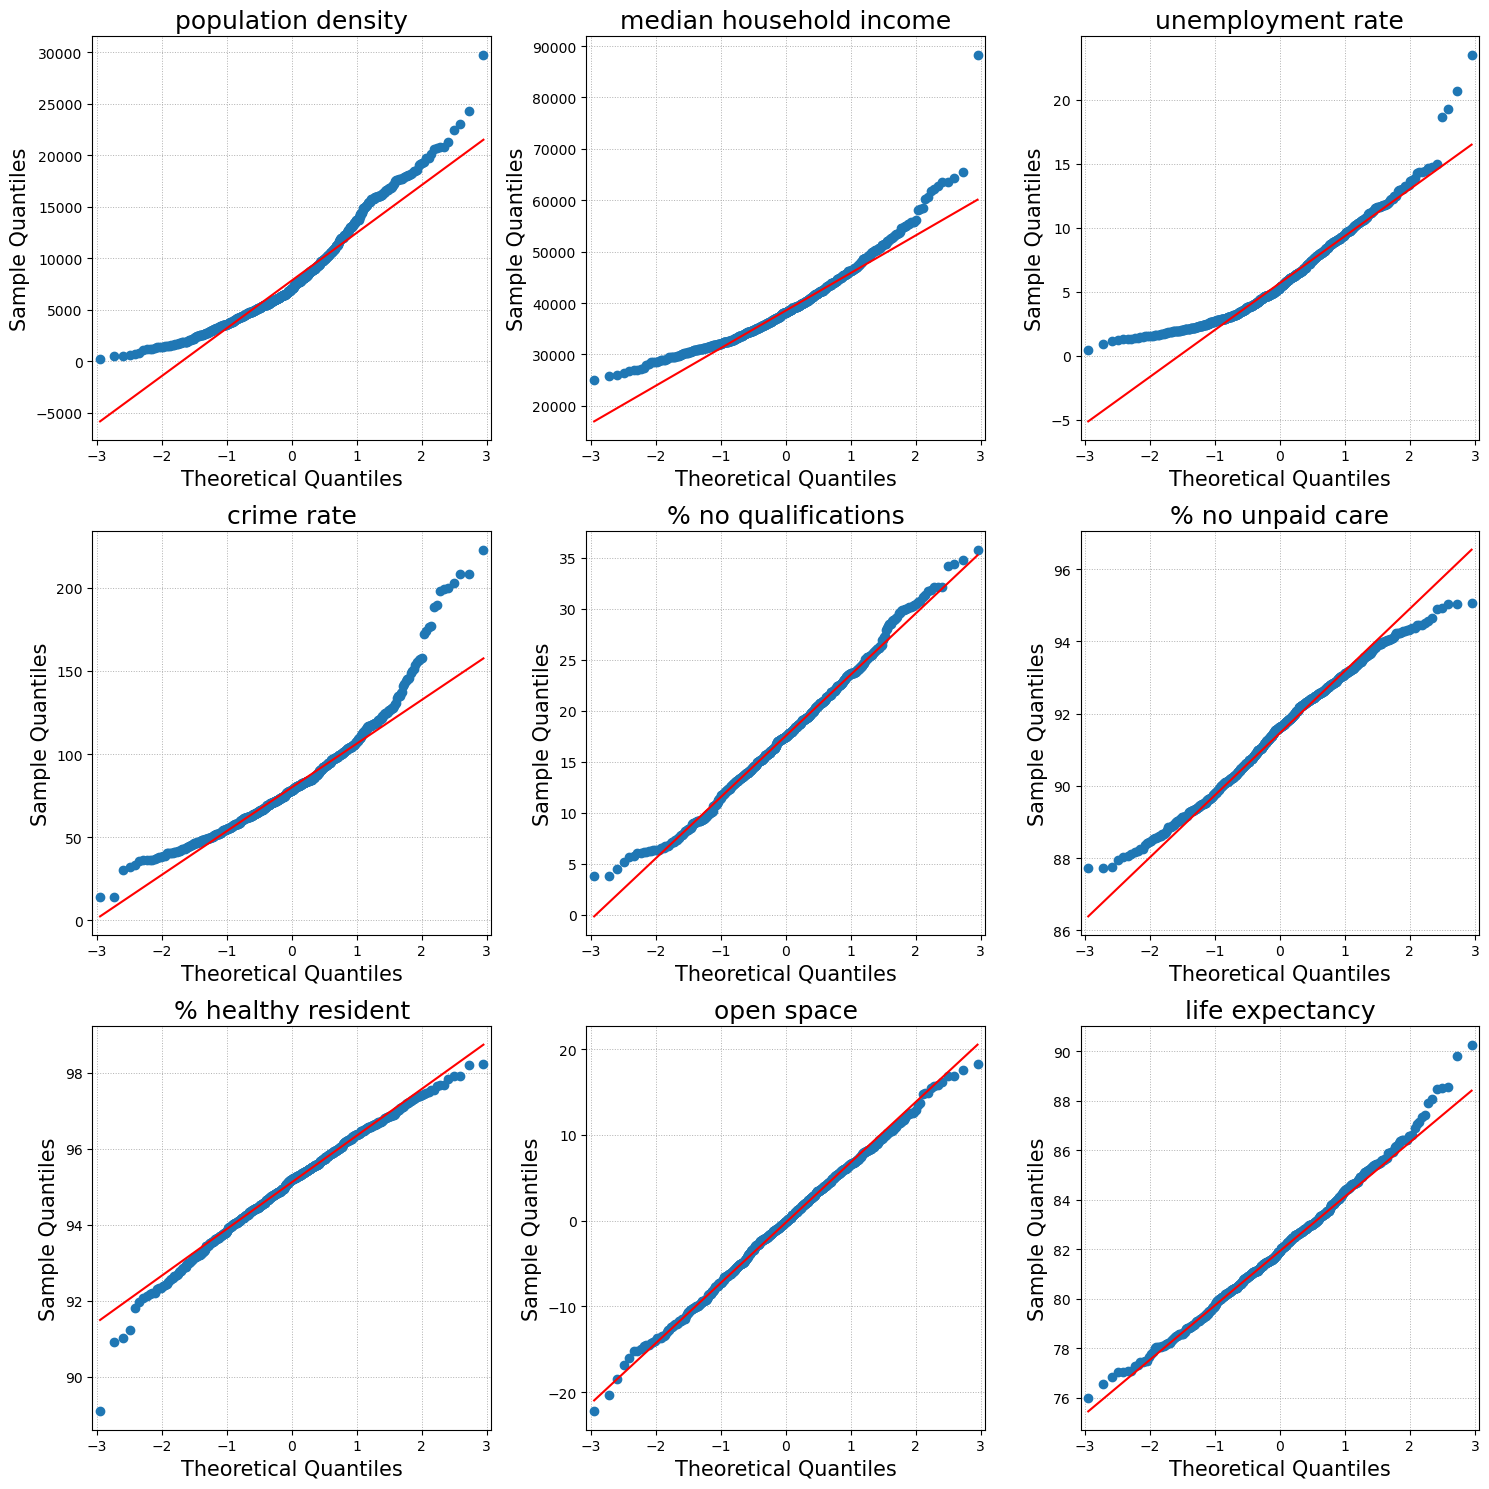

In [9]:
# Q-Q plot for checking data distribution
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=False)

for i, (col, ax) in enumerate(zip(dfdata.columns, axes.flatten())):
    qqplot(dfdata[col], line='q', ax=ax)
    ax.set_title(f'{col}', fontsize=18)
    ax.set_xlabel('Theoretical Quantiles', fontsize=15)
    ax.set_ylabel('Sample Quantiles', fontsize=15)
    ax.grid(linestyle=':', linewidth=0.7)

plt.tight_layout()

# save figure
plt.savefig("qm_22")

In [10]:
# make the correlation matrix
df_cormatrix = dfdata.corr(method='pearson')
# add a list to record the correlation coefficient values
corcoef_list = df_cormatrix['life expectancy'].tolist()

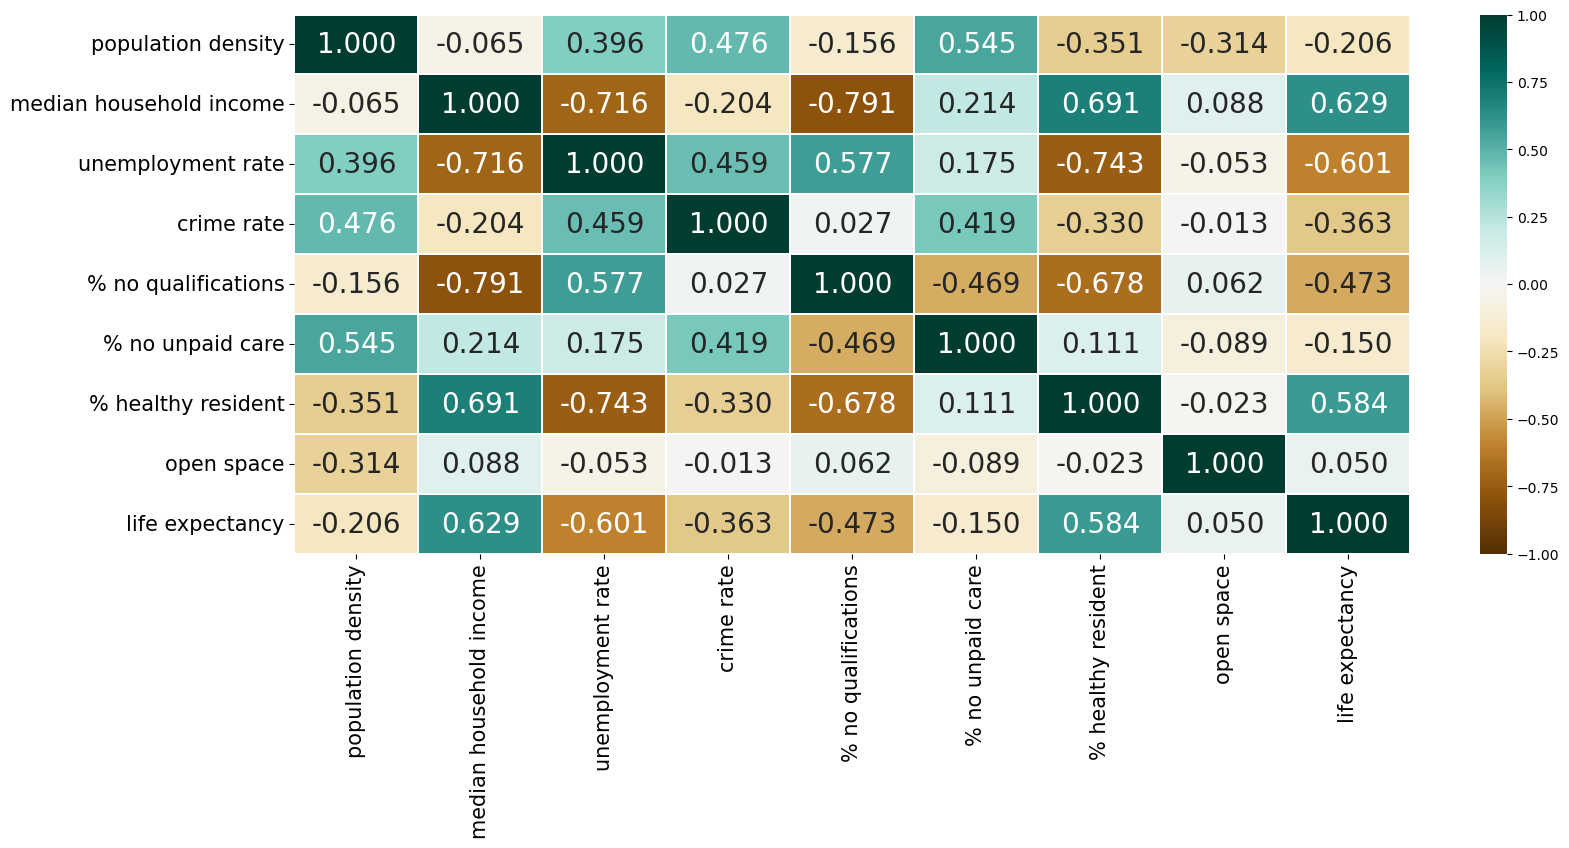

In [19]:
### plot the correlation matrix plot
# cor = df_cormatrix.sort_values(by='fires', ascending=False)
fig, axes = plt.subplots(figsize = (18,7))
sns.heatmap(df_cormatrix, cmap ='BrBG', annot = True, fmt='.3f', linewidths = 0.1, annot_kws = {'size': 20}, ax = axes, vmin=-1, vmax=1)
axes.tick_params(labelsize = 15)
# save figure
#plt.savefig("qm_41")
plt.show()

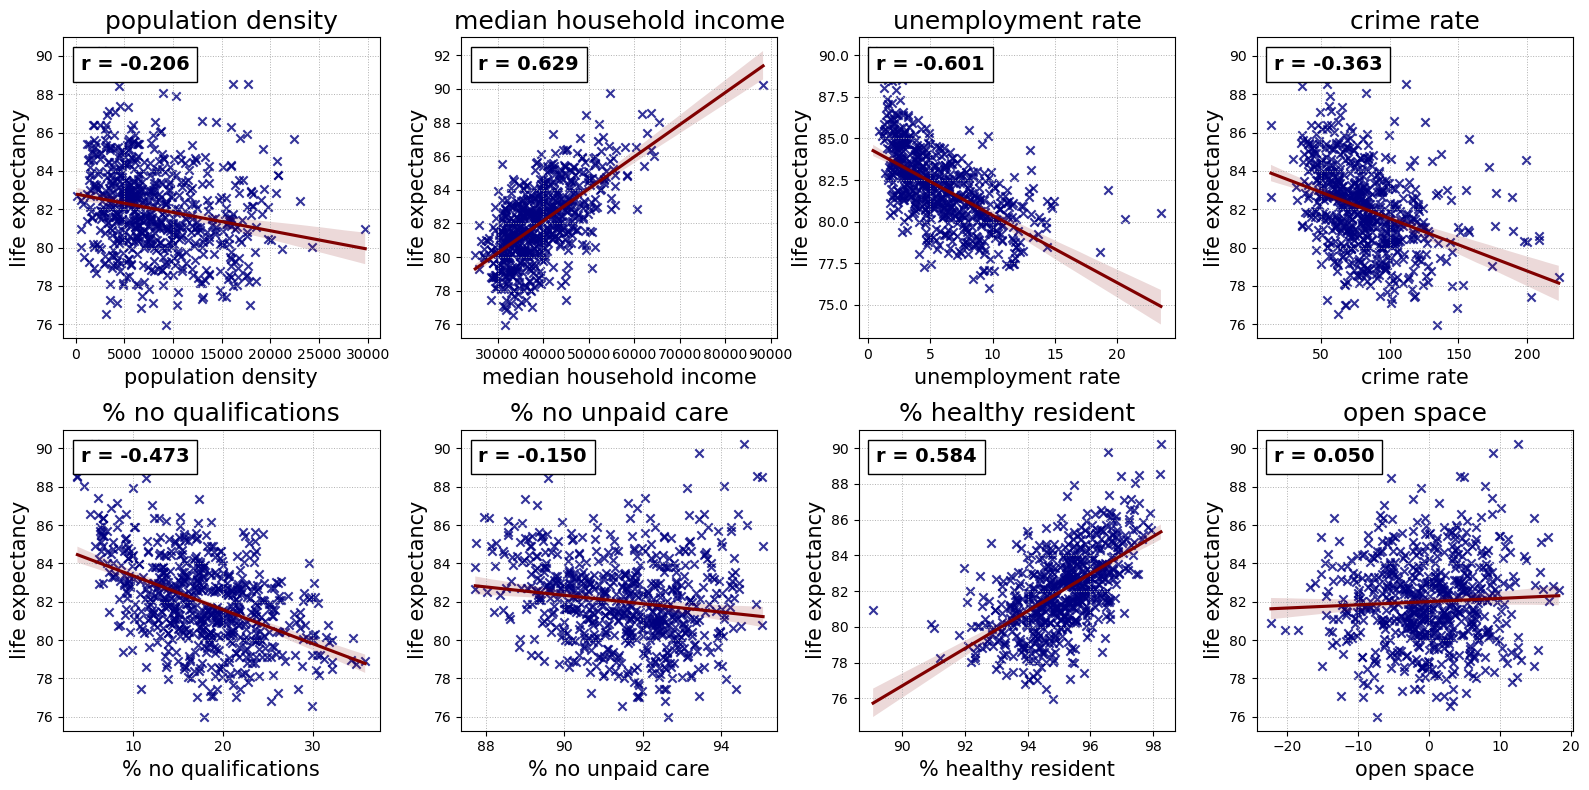

In [23]:
# scatter plots of explanatory variables vs response variable
from matplotlib.offsetbox import AnchoredText  # for adding some text
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=False)
locationindex = [1, 2, 1, 1, 1, 2, 2, 2]
for i, (col, ax) in enumerate(zip(dfdata.columns, axes.flatten())):
    sns.regplot(x = f'{col}', y = 'life expectancy', data = dfdata, color = 'navy', marker='x', ax = ax, line_kws = {"color": "maroon"})
    ax.set_title(f'{col}', fontsize=18)
    ax.set_xlabel(f'{col}', fontsize=15)
    ax.set_ylabel('life expectancy', fontsize=15)
    ax.grid(linestyle=':', linewidth=0.7)
    ax.add_artist(AnchoredText(f"r = {corcoef_list[i]:.3f}", loc=2,
                               prop=dict(size='14', color='k', weight='bold')))

plt.tight_layout()

In [33]:
# start to do the multiple linear regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# setting the variable set, x variables data and y variable data
X = warddata[colX]
Y = warddata[colY]

In [34]:
# splitting the dataset 80:20, tr for training data, te for testing data
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.2, random_state = 103)

###wardtrain = pd.concat([Xtr, Ytr], axis = 1)
###wardtrain.to_csv('/home/jovyan/work/Desktop/wardtrain.csv', encoding='utf-8')

In [35]:
# full model
MLRfull_sm = sm.OLS(Ytr, sm.add_constant(Xtr)).fit()
MLRfull_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life expectancy   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     74.37
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           9.83e-80
Time:                        14:37:55   Log-Likelihood:                -930.80
No. Observations:                 500   AIC:                             1880.
Df Residuals:                     491   BIC:                             1918.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      64.3295     10.947      5.876      0.000      42.821      85.838
population density       9.044e-05   2.32e-05      3.904      0.000    4.49e-05       0.000
median household income     0.0001   1.83e-05      6.872      0.000       9e-05       0.000
unemployment rate           0.0128      0.044      0.291      0.771      -0.073       0.099
crime rate                 -0.0099      0.003     -3.350      0.001      -0.016      -0.004
% no qualifications        -0.0292      0.026     -1.132      0.258      -0.080       0.021
% no unpaid care           -0.5120      0.070     -7.300      0.000      -0.650      -0.374
% healthy resident          0.6318      0.109      5.800      0.000       0.418       0.846
open space                  0.0238      0.012      2.072      0.039       0.001       0.046
==============================================================================
Omnibus:                        1.147   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.957
Skew:                          -0.088   Prob(JB):                        0.620
Kurtosis:                       3.122   Cond. No.                     6.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# using sk linear regression
MLRfull = LinearRegression()  
MLRfull.fit(Xtr, Ytr)

#Prediction of test set
Ypr= MLRfull.predict(Xte)

# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(Yte, Ypr))
print('Root Mean Square Error:', RMSE)

Root Mean Square Error: 1.4673773559068934


In [37]:
# remove one variable
Xtr1 = Xtr.drop(columns=['unemployment rate'])
Xte1 = Xte.drop(columns=['unemployment rate'])

In [38]:
MLRfull_sm = sm.OLS(Ytr, sm.add_constant(Xtr1)).fit()
MLRfull_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life expectancy   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     85.14
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.07e-80
Time:                        14:38:04   Log-Likelihood:                -930.85
No. Observations:                 500   AIC:                             1878.
Df Residuals:                     492   BIC:                             1911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      64.6084     10.895      5.930      0.000      43.202      86.015
population density       9.143e-05   2.29e-05      3.993      0.000    4.64e-05       0.000
median household income     0.0001   1.72e-05      7.236      0.000    9.04e-05       0.000
crime rate                 -0.0097      0.003     -3.348      0.001      -0.015      -0.004
% no qualifications        -0.0271      0.025     -1.095      0.274      -0.076       0.022
% no unpaid care           -0.5038      0.064     -7.835      0.000      -0.630      -0.377
% healthy resident          0.6221      0.104      6.005      0.000       0.419       0.826
open space                  0.0238      0.011      2.073      0.039       0.001       0.046
==============================================================================
Omnibus:                        1.158   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.968
Skew:                          -0.089   Prob(JB):                        0.616
Kurtosis:                       3.122   Cond. No.                     6.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# using sk linear regression
MLRfull = LinearRegression()  
MLRfull.fit(Xtr1, Ytr)

#Prediction of test set
Ypr= MLRfull.predict(Xte1)

# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(Yte, Ypr))
print('Root Mean Square Error:', RMSE)

Root Mean Square Error: 1.4708384611005434


In [41]:
# remove two variables
Xtr2 = Xtr1.drop(columns=['% no qualifications'])
Xte2 = Xte1.drop(columns=['% no qualifications'])

In [42]:
MLRfull_sm = sm.OLS(Ytr, sm.add_constant(Xtr2)).fit()
MLRfull_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life expectancy   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     99.09
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.86e-81
Time:                        14:40:26   Log-Likelihood:                -931.46
No. Observations:                 500   AIC:                             1877.
Df Residuals:                     493   BIC:                             1906.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      57.2776      8.597      6.662      0.000      40.386      74.170
population density       9.786e-05   2.21e-05      4.421      0.000    5.44e-05       0.000
median household income     0.0001   1.39e-05      9.699      0.000       0.000       0.000
crime rate                 -0.0096      0.003     -3.304      0.001      -0.015      -0.004
% no unpaid care           -0.4834      0.062     -7.854      0.000      -0.604      -0.362
% healthy resident          0.6693      0.094      7.105      0.000       0.484       0.854
open space                  0.0231      0.011      2.011      0.045       0.001       0.046
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.049
Skew:                          -0.095   Prob(JB):                        0.592
Kurtosis:                       3.120   Cond. No.                     5.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# using sk linear regression
MLRfull = LinearRegression()  
MLRfull.fit(Xtr2, Ytr)

#Prediction of test set
Ypr= MLRfull.predict(Xte2)

# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(Yte, Ypr))
print('Root Mean Square Error:', RMSE)

Root Mean Square Error: 1.4679268236181708
